In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv("/content/trainData.csv")

In [13]:
df["Class"].value_counts()

0    26352
1      871
Name: Class, dtype: int64

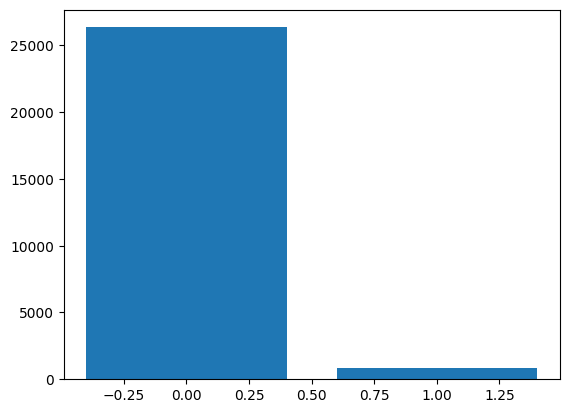

In [14]:
d1 = df["Class"].value_counts()
plt.bar(x=d1.index, height=d1.values)
plt.show()
# the data is imbalanced

In [15]:
data = df.copy()
X = data.drop(["Class"], axis = 1)
y = df["Class"]

In [16]:
#split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=56)

In [17]:
from imblearn.combine import SMOTETomek
# Import necessary libraries, make sure you have imbalanced-learn (imblearn) installed

# Balancing data using SMOTETomek
smt = SMOTETomek(random_state=42)
# Create an instance of the SMOTETomek class with a specified random state

X_resampled, y_resampled = smt.fit_resample(X_train, y_train)

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
Lr = LogisticRegression()
Lr.fit(X_resampled, y_resampled)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
y_pred = Lr.predict(X_test)

In [21]:
from sklearn.metrics import f1_score

In [22]:
print("F1 : ", f1_score(y_test, y_pred, average = "macro"))

F1 :  0.39073496980142397


In [23]:
from xgboost import XGBClassifier

In [24]:
XGB = XGBClassifier()

In [25]:
XGB.fit(X_resampled, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [26]:
y_pred = XGB.predict(X_test)

In [27]:
print("F1 : ", f1_score(y_test, y_pred, average = "macro"))

F1 :  0.7969752965567105


In [28]:
test = pd.read_csv("/content/testData.csv")

In [29]:
y_prediction = XGB.predict(test)

In [30]:
output = pd.DataFrame({'Class': y_prediction})
output

,Class
0,0
1,0
2,0
3,0
4,0
...,...
9761,0
9762,0
9763,0
9764,0


In [31]:
output.insert(0, 'ID', [i+1 for i in range(len(y_prediction))])
output

,ID,Class
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
9761,9762,0
9762,9763,0
9763,9764,0
9764,9765,0


In [32]:
output.to_csv('submission4.csv', index = False)